In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import json

In [3]:
with open("./cleaned_data_v3.json", 'r', encoding='utf-8') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [4]:
df.head()

,Judul,Penulis,Tahun,Abstrak
0,mixed reality system pepper ghost system kenda...,"[Aristyo Pramana, Eriq Muh. Adams Jonemaro, Wi...",2017,teknologi mixed reality interaksi user aplikas...
1,penjadwalan mata pelajaran metode tabu searchs...,"[Olive Khoirul L.M.A., Agus Wahyu Widodo, Budi...",2017,penjadwalan salah proses organisasi mencapai t...
2,push notification websocket,"[Andrias Yudianto, Eko Sakti Pramukantoro, Kas...",2017,memenuhi kebutuhan masyarakat ketersediaan inf...
3,sistem informasi manajemen keluhan pelanggan b...,"[Adzanil Rachmadi P, Fatwa Ramdani, Retno Inda...",2017,perusahaan mcdonalds perusahaan bergerak bidan...
4,metode store and forward hypertext transfer pr...,"[Muhammad Gigih Wicaksono, Aswin Suharsono, Ad...",2017,perkembangan internet pesat desa daerah terpen...


In [5]:
df.describe()

,Tahun
count,1744.000000
mean,2018.904817
std,2.071886
min,2017.000000
25%,2018.000000
50%,2018.000000
75%,2019.000000
max,2025.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744 entries, 0 to 1743
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Judul    1744 non-null   object
 1   Penulis  1744 non-null   object
 2   Tahun    1744 non-null   int64 
 3   Abstrak  1744 non-null   object
dtypes: int64(1), object(3)
memory usage: 54.6+ KB


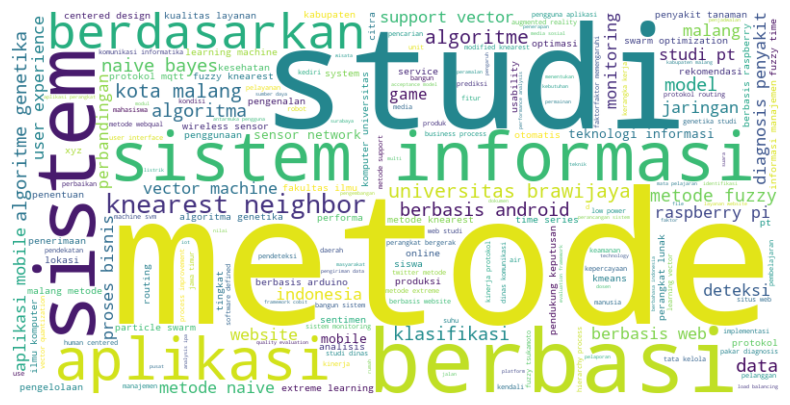

In [7]:
text = " ".join(df["Judul"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [8]:
df['Penulis'] = df['Penulis'].str.split(',') 
df = df.explode('Penulis') 
df['Penulis'] = df['Penulis'].str.strip()
author_counts = df['Penulis'].value_counts().head(10)

AttributeError: Can only use .str accessor with string values!

In [9]:
unique_authors_count = df['Penulis'].nunique()
print("Jumlah penulis unik:", unique_authors_count)

Jumlah penulis unik: 6683


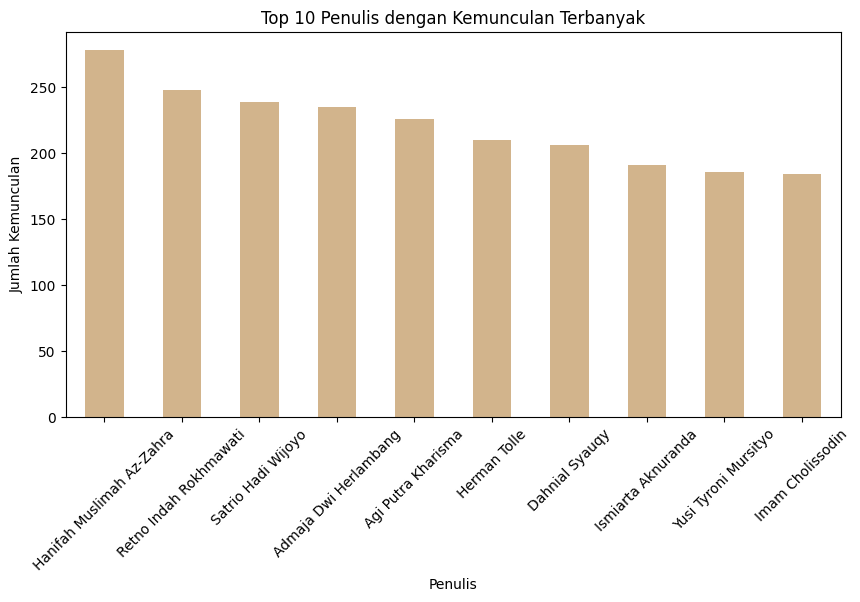

In [12]:
# Plot data
author_counts.plot(kind='bar', figsize=(10,5), color='tan')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Kemunculan')
plt.title('Top 10 Penulis dengan Kemunculan Terbanyak')
plt.xticks(rotation=45)
plt.show()